# A Regressão Logística

- É um modelo linear para classificação usando uma função dada por:

- Onde, para calcular s, vamos usar os mesmos conceitos da regressão linear (coef,intercept)

- Na regressão logística, ao invés de determinar um valor binário para a classe(0 e 1, maçã ou banana, fraude ou não), ela retorna a probabilidade de um evento ocorrer

    - como ele calcula probabilidades, é muito usado em problemas de classificação de crédito, previsão de saídas de clientes (churn) e até probabilidades de doenças.
    <br><br>
- Considerando uma única variável (petal width (cm)) para fazer a previsão do datasets iris, podemos visualizar primeiramente os dados e então traçar essa função logística 

- Com isso, podemos fazer a previsão para qualquer novo valor

In [6]:
# importando o dataset Iris
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)

In [7]:
#considerando apenas a coluna 'petal width (cm)' e os targets 0 e 1
X = X.loc[y.isin([0,1]),'petal width (cm)'].values
y = y[y.isin([0,1])].values


In [8]:
#separando em treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

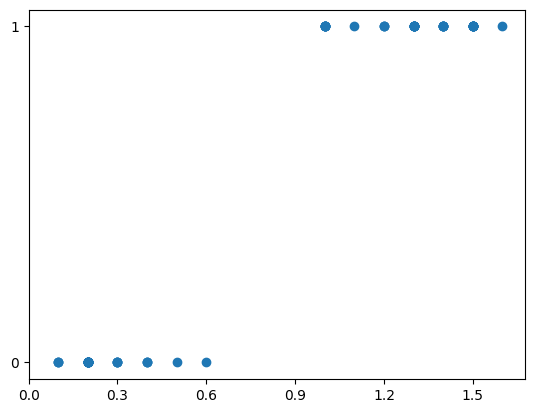

In [9]:
#visualizando graficamente
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(X_train,y_train)
ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [10]:
# importando a regressão logistica
from sklearn.linear_model import LogisticRegression

In [11]:
#criando o nosso classificador
clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1,1),y_train)

In [12]:
#verificando o coeficiente angular
w1 = clf.coef_[0][0]

In [13]:
#verificando o coeficiente linear
w0 = clf.intercept_[0]

para traçar esse gráfico, já temos a função expit do scipy
    - expit(x) = 1/(1+exp(-x))

In [14]:
#importando o expit
from scipy.special import expit

In [15]:
#importando o numpy e criando um array de 0 a 2
import numpy as np
valores_x = np.linspace(X_train.min(),X_train.max(),100)
#valores_x

- para o caso binário, podemos calcular a curva da função do coef_ e do intercept_ fazendo expit(x * w1 + w0)

In [16]:
# calculando o valor para cada valor de y
valores_y = expit(w1 * valores_x + w0)

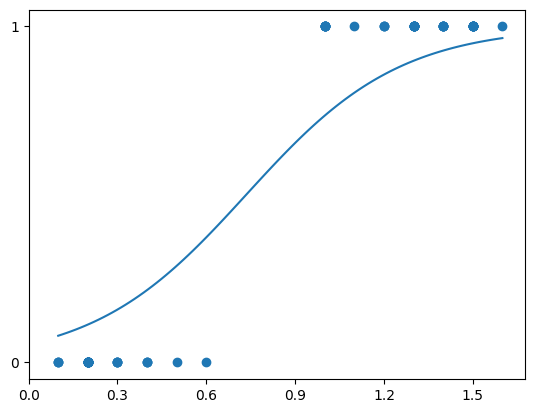

In [17]:
# visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(X_train,y_train)
ax.plot(valores_x,valores_y)

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [18]:
#podemos exibir os dados de treino em cima dessa curva
y_curva = expit(w1 * X_train + w0)

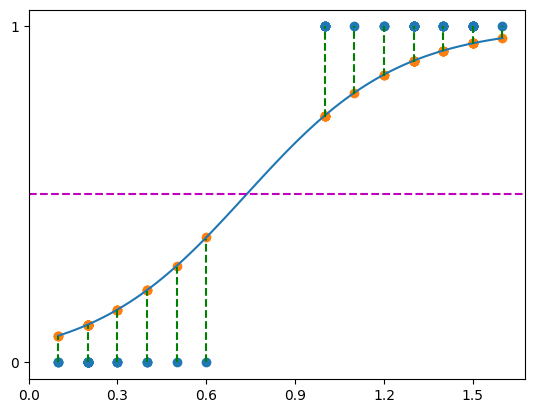

In [19]:
# Visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(X_train,y_train)
ax.plot(valores_x,valores_y)
ax.scatter(X_train,y_curva)

ax.axhline(y=0.5,c='m', linestyle='--')

ax.plot([0.1,0.1],[0,0.07883],'--g')
ax.plot([0.2,0.2],[0,0.11156652],'--g')
ax.plot([0.3,0.3],[0,0.15560101],'--g')
ax.plot([0.4,0.4],[0,0.21285167],'--g')
ax.plot([0.5,0.5],[0,0.28408003],'--g')
ax.plot([0.6,0.6],[0,0.36800066],'--g')
ax.plot([1,1],[0.72972574,1],'--g')
ax.plot([1.1,1.1],[0.79846697,1],'--g')
ax.plot([1.2,1.2],[0.85324086,1],'--g')
ax.plot([1.3,1.3],[0.89508404,1],'--g')
ax.plot([1.4,1.4],[0.92603135,1],'--g')
ax.plot([1.5,1.5],[0.94837655,1],'--g')
ax.plot([1.6,1.6],[0.96423221,1],'--g')

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [20]:
expit(w1 * 0.4 + w0)

0.21544737777346779

In [21]:
#fazendo a previsão das probabilidades
clf.predict_proba(X_test.reshape(-1,1))[0:5]

array([[0.03457121, 0.96542879],
       [0.10210384, 0.89789616],
       [0.01630449, 0.98369551],
       [0.84258107, 0.15741893],
       [0.78455262, 0.21544738]])

In [22]:
#verificando a previsão da probabilidade
y_pred = clf.predict_proba(X_test.reshape(-1,1))

In [23]:
y_pred[:,1]

array([0.96542879, 0.89789616, 0.98369551, 0.15741893, 0.21544738,
       0.11277323, 0.11277323, 0.8027766 , 0.11277323, 0.11277323,
       0.15741893, 0.11277323, 0.85679257, 0.11277323, 0.85679257,
       0.11277323, 0.92819091, 0.97621699, 0.07959343, 0.21544738,
       0.89789616, 0.89789616, 0.21544738, 0.11277323, 0.8027766 ,
       0.21544738, 0.15741893, 0.89789616, 0.07959343, 0.94999761,
       0.11277323, 0.11277323, 0.96542879])

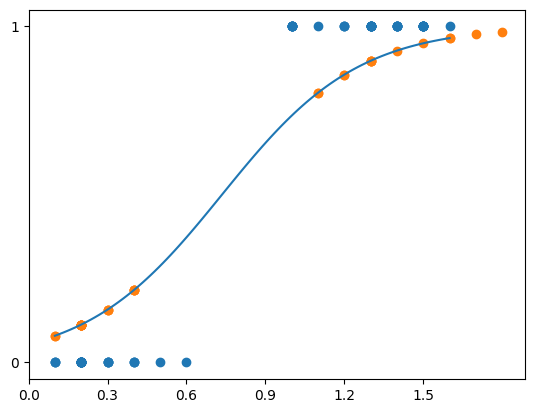

In [24]:
# visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(X_train,y_train)
ax.plot(valores_x,valores_y)
ax.scatter(X_test,y_pred[:,1])

ax.set(yticks=[0,1],xticks=[0,0.3,0.6,0.9,1.2,1.5])

plt.show()

In [25]:
# E apenas previsão
y_pred_valor = clf.predict(X_test.reshape(-1,1))

In [26]:
# Avaliando o erro
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_valor)

array([[19,  0],
       [ 0, 14]], dtype=int64)

In [27]:
#importando novamente o dataset 
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [28]:
#Separando em treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [29]:
#criando novamente
clf2 = LogisticRegression(random_state=0,max_iter=1000).fit(X_train,y_train)

In [30]:
#verificando o coef_
clf2.coef_

array([[-0.38854776,  0.85385236, -2.24493012, -0.9523827 ],
       [ 0.43789088, -0.36134256, -0.1237378 , -0.77276783],
       [-0.04934312, -0.4925098 ,  2.36866793,  1.72515052]])

In [31]:
#verificando o intercept_
clf2.intercept_

array([  8.69398827,   2.12547576, -10.81946404])

In [32]:
#fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [33]:
confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

In [34]:
from sklearn import metrics

In [35]:
# avaliando o erro
metrics.precision_score(y_test,y_pred2,average='macro')

1.0